In [40]:
from PIL import Image
import cv2
import os
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator  

In [41]:
data = []
labels = []
disease_name = []

In [42]:
import os
directory = '/content/drive/MyDrive/Eye_diseases'
 
for foldername in os.listdir(directory):
  disease_name.append(foldername)
  folder_path = img_path = os.path.join(directory, foldername)
  for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    temp = cv2.imread(img_path)
    data.append(temp)
    labels.append(foldername)


In [46]:
#shuffling data
idx = np.random.permutation(len(data))
temp_data = []
temp_labels = []
for i in idx:
  temp_data.append(data[i])
  temp_labels.append(labels[i])


data,labels =  temp_data,temp_labels

In [47]:
print(disease_name)

['Uveitis', 'Normal', 'Glaucoma', 'Crossed_Eyes', 'Cataracts', 'Bulging_Eyes']


In [48]:
for i in range(0,len(labels)):
  if labels[i] == disease_name[0] : labels[i] = 0
  if labels[i] == disease_name[1] : labels[i] = 1
  if labels[i] == disease_name[2] : labels[i] = 2
  if labels[i] == disease_name[3] : labels[i] = 3
  if labels[i] == disease_name[4] : labels[i]= 4
  if labels[i] == disease_name[5] : labels[i]= 5

In [49]:
labels = np.array(labels, dtype=  float)

In [50]:
labels = tf.keras.utils.to_categorical(labels, 6)

In [51]:
for i in range(0,len(data)):
  data[i] = cv2.resize(data[i], dsize=(150, 100), interpolation=cv2.INTER_CUBIC)
  data[i] = cv2.cvtColor(data[i],cv2.COLOR_BGR2RGB)
  data[i] = np.array(data[i])

array([0., 1., 0., 0., 0., 0.], dtype=float32)

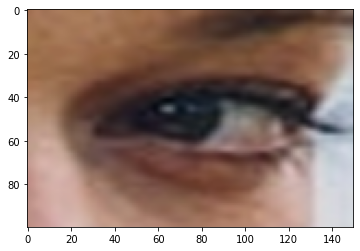

In [52]:
plt.imshow(data[200])
labels[200]

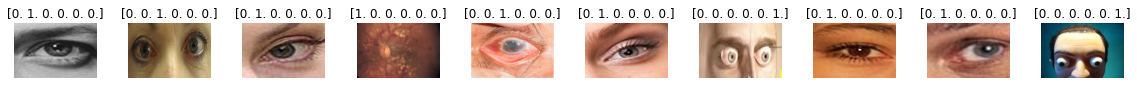

In [53]:
def plot_multiple(training_images, training_labels):
  fig, axes = plt.subplots(1, 10, figsize=(16, 15))
  axes = axes.flatten()
  letters = list(string.ascii_lowercase)

  for k in range(10):
    img = training_images[k]
    img = tf.keras.utils.array_to_img(img)
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(str(training_labels[k]))
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_multiple(data,labels)

In [54]:
# train ---> 70 percent , test---->30 percent
train_data,train_labels = data[:int(0.7 * len(data))],labels[:int(0.7 * len(data))]
test_data,test_labels = data[int(0.7 * len(data)) : ],labels[int(0.7 * len(data)):]

In [55]:
train_data = np.array(train_data)
test_data = np.array(test_data)

In [56]:
train_data.shape

(205, 100, 150, 3)

In [57]:
test_data.shape

(88, 100, 150, 3)

In [58]:
train_datagen = ImageDataGenerator(rescale = 1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2
                                        ,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

train_generator = train_datagen.flow(x=train_data,y= train_labels,batch_size=40)
                                      
                                      
validation_datagen = ImageDataGenerator(rescale = 1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2
                                        ,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
    

validation_generator = validation_datagen.flow(x=test_data,y=test_labels,batch_size=10) 

In [59]:
print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (205, 100, 150, 3)
Labels of training generator have shape: (205, 6)
Images of validation generator have shape: (88, 100, 150, 3)
Labels of validation generator have shape: (88, 6)


In [61]:
def create_model():

  ### START CODE HERE

  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(6, activation='softmax')  
    ])

  
  from tensorflow.keras.optimizers import Adam
  model.compile(optimizer= 'adam' ,
                loss='categorical_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model

In [103]:
# Save your model
model = create_model()

# Train your model
history = model.fit(train_generator,
                    epochs=200,
                    validation_data=validation_generator)

Epoch 1/200
6/6 [==============================] - 9s 2s/step - loss: 1.6815 - accuracy: 0.3951 - val_loss: 1.6833 - val_accuracy: 0.4545
Epoch 2/200
6/6 [==============================] - 7s 1s/step - loss: 1.6519 - accuracy: 0.4098 - val_loss: 1.7203 - val_accuracy: 0.4545
Epoch 3/200
6/6 [==============================] - 8s 1s/step - loss: 1.6462 - accuracy: 0.4098 - val_loss: 1.6337 - val_accuracy: 0.4545
Epoch 4/200
6/6 [==============================] - 7s 1s/step - loss: 1.6629 - accuracy: 0.4098 - val_loss: 1.6829 - val_accuracy: 0.4545
Epoch 5/200
6/6 [==============================] - 7s 1s/step - loss: 1.6346 - accuracy: 0.4098 - val_loss: 1.6286 - val_accuracy: 0.4545
Epoch 6/200
6/6 [==============================] - 7s 1s/step - loss: 1.6209 - accuracy: 0.4098 - val_loss: 1.6500 - val_accuracy: 0.4545
Epoch 7/200
6/6 [==============================] - 8s 1s/step - loss: 1.6289 - accuracy: 0.4098 - val_loss: 1.6116 - val_accuracy: 0.4545
Epoch 8/200
6/6 [=================

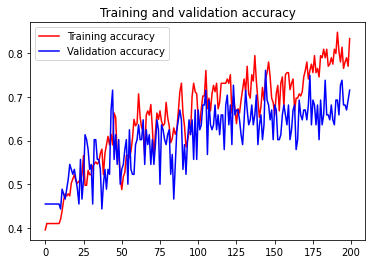

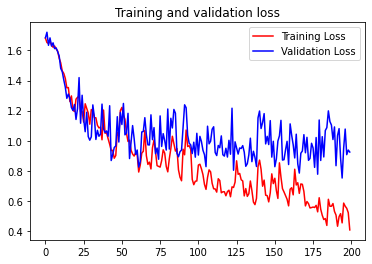

In [104]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [108]:
model.save('my_model.h5')

In [109]:
new_model = tf.keras.models.load_model('my_model.h5')

predict(
    x,
    batch_size=None,
    verbose='auto',
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)

In [110]:
import requests
from io import BytesIO

# response = requests.get("https://d31g6oeq0bzej7.cloudfront.net/Assets/image/jpeg/569d372d-deb0-487c-8300-2d00eba68b4b.jpg")
# test_image = Image.open(BytesIO(response.content))
# test_image = np.asarray(test_image)
test_image = cv2.imread('/content/drive/MyDrive/Eye_diseases/Cataracts/image-10.jpeg')



In [111]:
test_image = cv2.resize(test_image, dsize=(150, 100), interpolation=cv2.INTER_CUBIC)
test_image = cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)

In [112]:
my_array = [test_image]
my_array = np.array(my_array)

In [113]:
my_array.shape

(1, 100, 150, 3)

In [114]:
model.predict(my_array)

array([[0.05134797, 0.        , 0.39526832, 0.        , 0.5533837 ,
        0.        ]], dtype=float32)

In [115]:
pred = np.argmax(model.predict(my_array), axis=-1)

In [116]:
pred

array([4])

In [117]:
disease_name

['Uveitis', 'Normal', 'Glaucoma', 'Crossed_Eyes', 'Cataracts', 'Bulging_Eyes']

In [118]:
print(disease_name[pred[0]])

Cataracts
